In [1]:
import tensorflow as tf
import numpy as np

## Loading Data

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0


In [4]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## Model Building

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
                                  

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Training

In [8]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.6105 - accuracy: 0.7778
Epoch 2/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3078 - accuracy: 0.8882
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2531 - accuracy: 0.9069
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2175 - accuracy: 0.9186
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1877 - accuracy: 0.9297


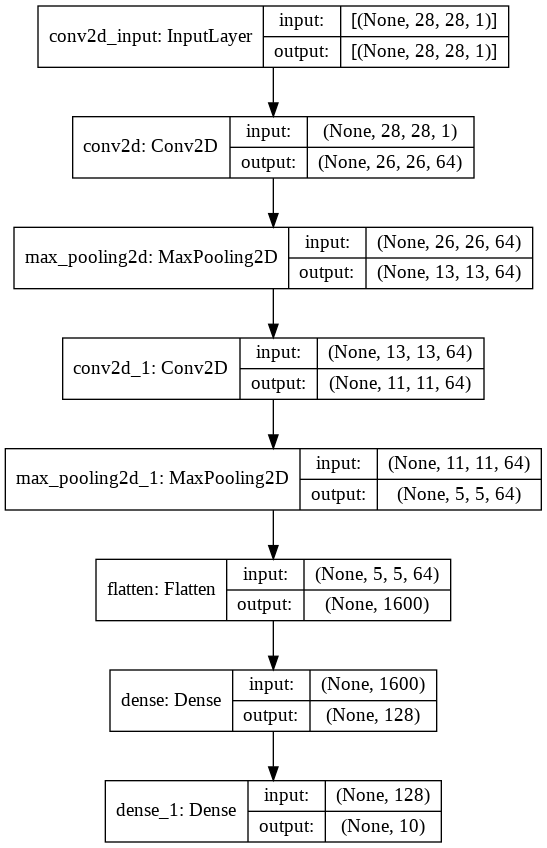

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

## TESTING

In [10]:
test_loss = model.evaluate(test_images, test_labels)


313/313 [==============================] - 4s 11ms/step - loss: 0.2672 - accuracy: 0.9052
